In [6]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Introducción a la Teoría de la Computación

## 1. Pensar el programas como demostraciones

**Teorema** (del valor intermedio). 
Sea $f:[a, b] \to \mathbb{R}$ contínua con $f(a) < 0$ y $f(b) > 0$, entonces
existe un $\xi \in (a, b)$ con $f(\xi) = 0$.

*Demostración*.
- Considere el siguiente algoritmo:

In [7]:
def bisect(f, a, b, n_iters=64):
    for n in range(n_iters):
        xi = (a + b)/2
        y = f(xi)
        if y > 0:
            b = xi
        elif y < 0:
            a = xi
        else: break  # y == 0
    return xi

- Si el algoritmo termina en la línea 10 entonces claramente existe un $\xi$ 
  con $f(\xi) = 0$.
  Supongamos entonces que el algoritmo no termina ahí.
- En cada iteración $n$ del ciclo `while` la variable `a` crece forman una
  sucesión:
  $$a = a_0 \le a_1 \le a_2 \le a_3 \le \cdots \le b$$
- Esta sucesión está acotada, entonces $\xi = \lim_{n\to\infty} a_n$ existe
  (¿por qué?).
- $|b_n - a_n| = |b - a|/2^{n - 1} \to 0$, entonces $\lim_{n \to \infty} b_n =
  \xi$ también.
- De las líneas 7 y 9 se sigue que $f(a_n) < 0$ y $f(b_n) > 0$ para toda $n$.
- Por la continuidad de $f$ se sigue que $f(\xi) = \lim_{n \to \infty} f(a_n)
  \le 0$ y $f(\xi) = \lim_{n \to \infty} f(b_n) \ge 0$, por lo tanto $f(\xi) =
  0$.
$\square$

**Observación** Este algoritmo tiene doble propósito:
- Es una demostración de un teorema
- Es un método útil para encontrar el 0 de una función contínua arbitraria

In [8]:
def p(x):
    return (1/6)*x**3 - 9*x + 17

xi = bisect(p, -10, 10)

p(-8.15520393570429) == 0.0


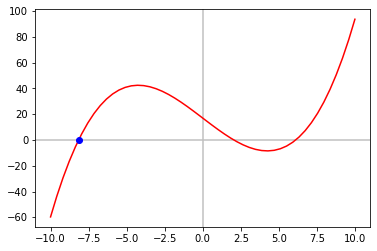

In [9]:
fig, ax = plt.subplots()
x = np.linspace(-10, 10)
ax.axvline(0, color='silver')
ax.axhline(0, color='silver')
ax.plot(x, [p(x_i) for x_i in x], color='red')
ax.plot([xi], [p(xi)], 'o', color='blue')
print(f'p({xi}) == {p(xi)}')

# 2. Numerabilidad

**Definición** Un *enumerador* es un algoritmo que produce una sucesión
posiblemente infinita de salidas.

In [28]:
def multiplos(a):
    n = 0
    while True:
        yield a*n
        n += 1

In [38]:
salida = multiplos(7)
print(next(salida))
print(next(salida))
print(next(salida))
print(next(salida))
print(next(salida))

0
7
14
21
28


In [60]:
def siguientes(iterable, n):
    return list(itertools.islice(iterable, n))

In [61]:
siguientes(salida, 10)

[35, 42, 49, 56, 63, 70, 77, 84, 91, 98]

In [62]:
siguientes(salida, 10)

[105, 112, 119, 126, 133, 140, 147, 154, 161, 168]

**Definición** Un conjunto $A$ es *recursivamente enumerable* si existe un
enumerador que produce todos los elementos de $A$ sin repetición.

**Teorema** Si $A$ es un conjunto recursivamente enumerable entonces es finito o
bien está en biyección con $\mathbb{N}$.

In [55]:
def hacer_funcion(iterable):
    elementos = []  # Espacio para almacenar primeros elementos del iterable
    iterador = iter(iterable)
    
    def f(n):  # Esta será la función biyectiva
        m = len(elementos)
        if n >= m:  # ¿Necesitamos producir más elementos?
            for k in range(n - m + 1):
                elementos.append(next(iterador))
        return elementos[n]  # Devolver el n-ésimo elemento
    
    return f

In [56]:
f = hacer_funcion(multiplos(3))
for n in range(20):
    print(f'f({n}) = {f(n)}')

f(0) = 0
f(1) = 3
f(2) = 6
f(3) = 9
f(4) = 12
f(5) = 15
f(6) = 18
f(7) = 21
f(8) = 24
f(9) = 27
f(10) = 30
f(11) = 33
f(12) = 36
f(13) = 39
f(14) = 42
f(15) = 45
f(16) = 48
f(17) = 51
f(18) = 54
f(19) = 57


**Lema** Si existe un enumerador que produce todos los elementos de un conjunto
$A$ posiblemente con repetición entonces es recursivamente enumerable. 

In [54]:
def quitar_repetidos(iterable):
    vistos = set()
    for x in iterable:
        if x in vistos: continue
        vistos.add(x)
        yield x

**Lema** Si $A$ es un conjunto finito y $B$ es recursivamente enumerable
entonces $A \cup B$ es recursivamente enumerable.

In [57]:
def enumerar_union(A, B):
    yield from A
    yield from B

**Lema** Si $\mathcal{F} = \lbrace A_1, A_2, \ldots, A_m\rbrace$ es una familia
finita de conjuntos recursivamente enumerables entonces $\bigcup \mathcal{F} =
A_1 \cup A_2 \cup \cdots \cup A_m$ es recursivamente numerable.

In [58]:
import collections

In [59]:
def enumerar_union(*F):
    F = collections.deque(F)
    while F:
        A = F.popleft()
        x = next(A, None)
        if x is None: continue
        yield x
        F.append(A)

In [66]:
salida = enumerar_union(multiplos(2), multiplos(6), multiplos(5))
siguientes(salida, 20)

[0, 0, 0, 2, 6, 5, 4, 12, 10, 6, 18, 15, 8, 24, 20, 10, 30, 25, 12, 36]

In [67]:
salida = enumerar_union(multiplos(2), multiplos(6), multiplos(5))
salida = quitar_repetidos(salida)
siguientes(salida, 20)

[0, 2, 6, 5, 4, 12, 10, 18, 15, 8, 24, 20, 30, 25, 36, 14, 42, 35, 16, 48]

## 2. De qué va la Teoría de la Computación